In [1]:
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.axes import Axes
from matplotlib.cm import coolwarm

import gpflow

2024-11-10 15:40:36.282460: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-10 15:40:36.374861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-10 15:40:36.374883: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-10 15:40:36.401883: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 15:40:36.854995: W tensorflow/stream_executor/platform/de

In [ ]:
import numpy as np
import gpflow
from gpflow.models import GPR
from gpflow.kernels import SquaredExponential
from gpflow.optimizers import Scipy
import tensorflow as tf

from emukit.model_wrappers import GPflowModelWrapper
from emukit.core import ParameterSpace, ContinuousParameter
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement
from emukit.bayesian_optimization.loops import BayesianOptimizationLoop

# Step 1: Load and prepare your data
N_samples = 100
input_dim = 10

# Replace with your actual data
X = np.random.uniform(-1, 1, size=(N_samples, input_dim))
Y = np.sum(np.sin(X), axis=1, keepdims=True) + np.random.normal(0, 0.1, size=(N_samples, 1))

# Step 2: Normalize the data using TensorFlow
X_mean, X_std = tf.reduce_mean(X, axis=0), tf.math.reduce_std(X, axis=0)
X_normalized = (X - X_mean) / X_std

Y_mean, Y_std = tf.reduce_mean(Y, axis=0), tf.math.reduce_std(Y, axis=0)
Y_normalized = (Y - Y_mean) / Y_std

# Step 3: Define the GPflow model
kernel = SquaredExponential()
gp_model = GPR(data=(X_normalized, Y_normalized), kernel=kernel, mean_function=None)

# Step 4: Optimize the GPflow model
optimizer = Scipy()

@tf.function
def objective_closure():
    return gp_model.training_loss()

optimizer.minimize(objective_closure, variables=gp_model.trainable_variables, options=dict(maxiter=100))

# Step 5: Wrap the model with Emukit
emukit_model = GPflowModelWrapper(gp_model)

# Step 6: Define the parameter space
parameter_space = ParameterSpace([
    ContinuousParameter(f'x{i+1}', -1, 1) for i in range(input_dim)
])

# Step 7: Set up the Bayesian Optimization loop
acquisition = ExpectedImprovement(model=emukit_model)
bo_loop = BayesianOptimizationLoop(
    model=emukit_model,
    space=parameter_space,
    acquisition=acquisition
)

# Step 8: Run the optimization loop
num_iterations = 10
bo_loop.run_loop(X_normalized, num_iterations)

# Step 9: Retrieve and denormalize results
X_opt_normalized = bo_loop.loop_state.X
Y_opt_normalized = bo_loop.loop_state.Y

X_opt = X_scaler.inverse_transform(X_opt_normalized)
Y_opt = Y_scaler.inverse_transform(Y_opt_normalized)

# Print optimized inputs and outputs
print("Optimized Inputs (X):")
print(X_opt)

print("\nOptimized Outputs (Y):")
print(Y_opt)


2024-11-11 14:22:01.460529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 14:22:01.553352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-11 14:22:01.553373: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-11 14:22:01.582053: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 14:22:02.003457: W tensorflow/stream_executor/platform/de

ImportError: cannot import name 'GPflowModelWrapper' from 'emukit.model_wrappers' (/home/qezlou/miniconda3/envs/het-cosmo/lib/python3.8/site-packages/emukit/model_wrappers/__init__.py)

Mean Squared Error on training data: [1.00428376e-03 1.29992406e-03 3.82553516e-03 2.63270169e-03
 7.34199023e-04 1.85871635e-04 3.75403779e-03 1.42098069e-06
 2.59731690e-05 6.85868238e-02 1.76019620e-04 1.17277821e-02
 4.36997758e-03 3.28698871e-02 7.00113418e-05 2.42991517e-03
 1.23990141e-02 3.07897806e-02 1.94434446e-03 8.51384720e-03
 8.27282665e-05 3.19044012e-03 1.21755915e-04 2.71271406e-02
 6.47731410e-03 1.74278903e-03 6.48316515e-03 3.06627989e-02
 4.14304132e-03 5.04470066e-06 1.63983024e-02 6.72935063e-03
 7.81468305e-05 3.03234990e-03 9.40521010e-04 1.68412182e-02
 4.13435189e-02 5.15167377e-05 6.98979702e-03 8.64346891e-03
 6.81993618e-03 4.37969069e-03 7.38030311e-04 3.14301190e-04
 2.99082315e-03 1.98670290e-02 3.43741802e-06 7.47901672e-03
 2.08276997e-02 3.80987678e-05 3.25902239e-03 1.10974581e-06
 1.14755563e-04 1.91546354e-03 2.20352561e-02 1.59182087e-05
 2.19571745e-03 5.32182065e-03 6.27361940e-03 8.63518569e-04
 1.07061471e-02 1.82345945e-02 4.66642762e-03 1.

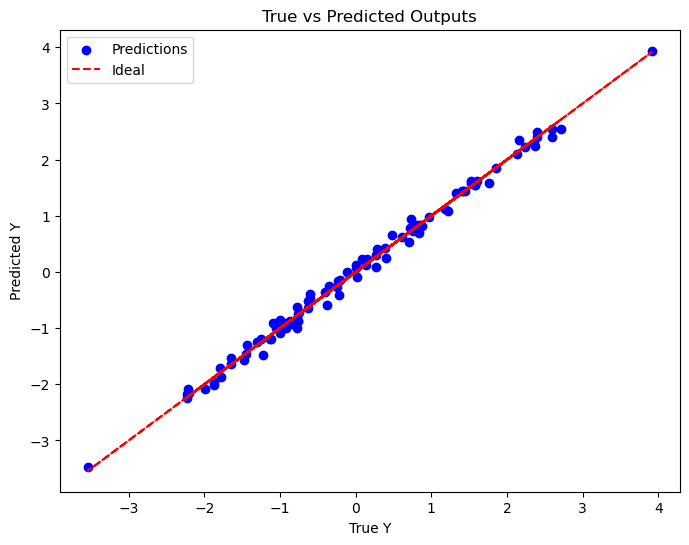

In [4]:
import numpy as np
import gpflow
from gpflow.models import GPR
from gpflow.kernels import SquaredExponential
from gpflow.optimizers import Scipy
import tensorflow as tf
from tensorflow.keras.losses import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load and prepare your data
N_samples = 100
input_dim = 10

# Replace with your actual data
X = np.random.uniform(-1, 1, size=(N_samples, input_dim))
Y = np.sum(np.sin(X), axis=1, keepdims=True) + np.random.normal(0, 0.1, size=(N_samples, 1))

# Step 2: Normalize the data using TensorFlow
X_min, X_max = tf.reduce_min(X, axis=0), tf.reduce_max(X, axis=0)
X_normalized = (X - X_min) / (X_max - X_min)

Y_mean, Y_std = tf.reduce_mean(Y, axis=0), tf.math.reduce_std(Y, axis=0)
Y_normalized = (Y - Y_mean) / Y_std

# Step 3: Define the GPflow model
kernel = SquaredExponential(lengthscales=np.ones(input_dim))
gp_model = GPR(data=(X_normalized, Y_normalized), kernel=kernel, mean_function=None)

# Step 4: Optimize the GPflow model
optimizer = Scipy()

@tf.function
def objective_closure():
    return gp_model.training_loss()

optimizer.minimize(objective_closure, variables=gp_model.trainable_variables, options=dict(maxiter=100))

# Step 5: Make predictions
mean, variance = gp_model.predict_f(X_normalized)

# Denormalize predictions
Y_pred = mean * Y_std + Y_mean


# Step 6: Evaluate the model
mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error on training data: {mse}")

# Step 7: Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(Y, Y_pred, c='blue', label='Predictions')
plt.plot(Y, Y, 'r--', label='Ideal')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('True vs Predicted Outputs')
plt.legend()
plt.show()


In [1]:
import importlib
import summary_stats
import single_fid
import h5py
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(summary_stats)
importlib.reload(single_fid)
proj = summary_stats.ProjCorr(data_dir='/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/', fid='L2')
_, Y, model_err = proj.get_mean_std()
X = proj.get_params_array()
print(f'X shape: {X.shape}, Y shape: {Y.shape}, model_err shape: {model_err.shape}') 
sf = single_fid.SingleFid(X = X, Y = Y, model_err = model_err)


2024-11-12 12:28:23.705146: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-12 12:28:23.798099: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-12 12:28:23.798121: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-12 12:28:23.824681: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 12:28:24.268342: W tensorflow/stream_executor/platform/de

X shape: (200, 10), Y shape: (200, 65), model_err shape: (200, 65)


2024-11-12 12:28:26.647268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-11-12 12:28:26.647294: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-11-12 12:28:26.647310: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (qpc): /proc/driver/nvidia/version does not exist
2024-11-12 12:28:26.647501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


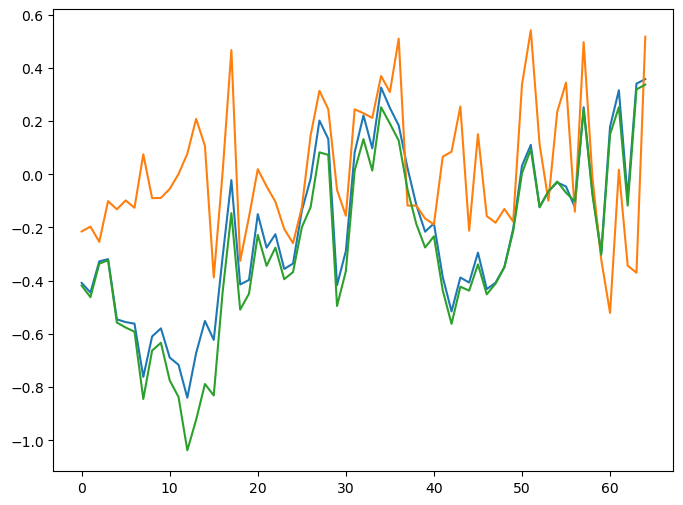

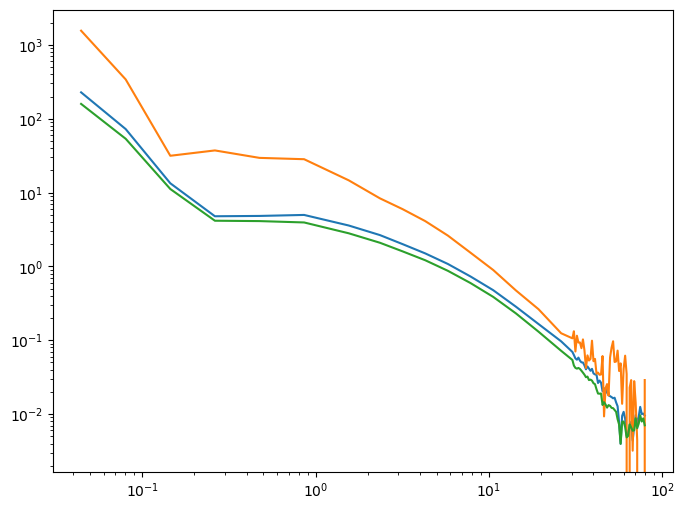

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for i in [10, 45, 190]:
    ax.plot(sf.Y_normalized[i,:])
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in [10, 45, 190]:
    ax.plot(proj.rp, Y[i,:])
ax.set_yscale('log')
ax.set_xscale('log')

logspace:

In [19]:
import importlib
import summary_stats
import single_fid
import h5py
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(summary_stats)
importlib.reload(single_fid)
proj = summary_stats.ProjCorr(data_dir='/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/', fid='L2', logging_level='INFO')
_, wp, model_err = proj.get_mean_std(r_range=[0, 100])
X = proj.get_params_array()

# We have negative values as low as -1, so we need to replace them with a small number
# since we are going to take the log10 of the data. The wp changes alot, so log is better
Y = wp
Y[Y < 0] = 1e-10
Y = np.log10(wp)


print(f'X shape: {X.shape}, Y shape: {Y.shape}, model_err shape: {model_err.shape}') 
sf = single_fid.SingleFid(X = X, Y = Y, model_err = model_err, logging_level='DEBUG')
sf.train()


11/12/2024 11:21:42 PM Total snapshots: 200
11/12/2024 11:21:42 PM Total snapshots: 200
11/12/2024 11:21:42 PM Total snapshots: 200
11/12/2024 11:21:42 PM Total snapshots: 200
11/12/2024 11:21:42 PM Orignial corr shape (100, 65, 5)
11/12/2024 11:21:42 PM Orignial corr shape (100, 65, 5)
11/12/2024 11:21:42 PM Orignial corr shape (100, 65, 5)
11/12/2024 11:21:42 PM Orignial corr shape (100, 65, 5)
11/12/2024 11:21:42 PM Found 19.1 % of W_rp_pi is negative
11/12/2024 11:21:42 PM Found 19.1 % of W_rp_pi is negative
11/12/2024 11:21:42 PM Found 19.1 % of W_rp_pi is negative
11/12/2024 11:21:42 PM Found 19.1 % of W_rp_pi is negative
11/12/2024 11:21:42 PM Found 2.8 % of W_rp is all negeative along the pi direction
11/12/2024 11:21:42 PM Found 2.8 % of W_rp is all negeative along the pi direction
11/12/2024 11:21:42 PM Found 2.8 % of W_rp is all negeative along the pi direction
11/12/2024 11:21:42 PM Found 2.8 % of W_rp is all negeative along the pi direction
11/12/2024 11:21:42 PM Load IC f

X shape: (200, 10), Y shape: (200, 65), model_err shape: (200, 65)


<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=5.903162190690233> <tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([  0.45316684, 102.59173845,   0.94174156,   0.50476667,
         1.07355422,   4.03825705,   2.93270373,   2.49456579,
         3.24082132,   2.19371419])>


(0.0, 50.0)

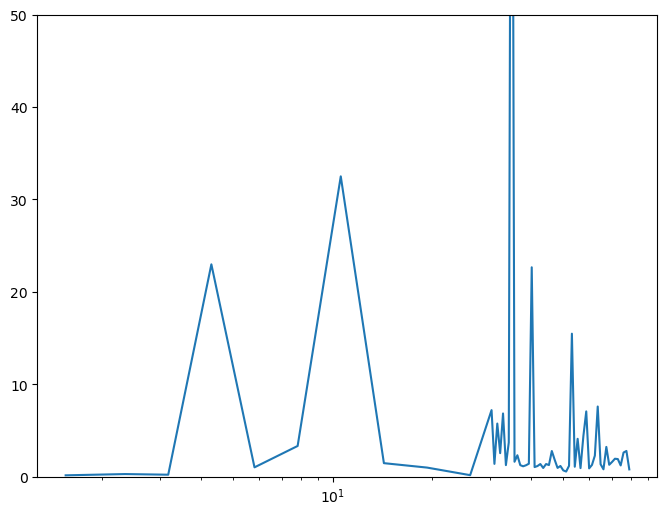

In [17]:
print(sf.model.kernel.variance, sf.model.kernel.lengthscales)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ind = (proj.rp > 1) & (proj.rp < 101)
ax.plot(proj.rp[ind], loo_errors)
ax.set_xscale('log')
ax.set_ylim(0, 50)

In [21]:
sf.train()
print(sf.model.kernel.variance, sf.model.kernel.lengthscales)

<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=4.776843541476281> <tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([  0.43253967, 148.88641065,   0.86614786,   0.47948508,
         1.00815113,   3.87472013,   2.60536307,   2.21123948,
         3.03114632,   1.99886325])>


In [14]:
proj.params_list

['omega0',
 'omegab',
 'hubble',
 'scalar_amp',
 'ns',
 'w0_fld',
 'wa_fld',
 'N_ur',
 'alpha_s',
 'm_nu']

/tmp/ipykernel_159543/2891832936.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 30)


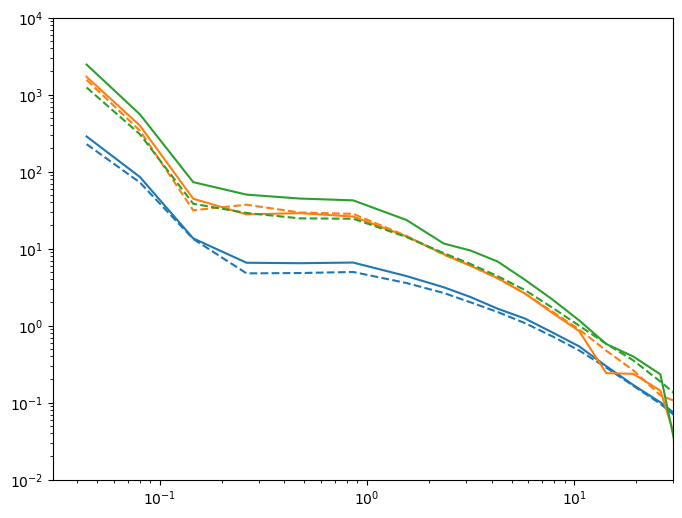

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#ax.plot(proj.rp, Y[0,:], label='True')
mean_pred,_ = sf.predict(sf.X)
for c, i in enumerate([10, 45, 34]):
    #ax.plot(proj.rp, Y[i,:], label='True')
    ax.plot(proj.rp, 10**mean_pred[i], label='Predicted', color=f'C{c}') 
    ax.plot(proj.rp, 10**Y[i,:], label='True', ls='--', color=f'C{c}')
ax.set_xscale('log')
ax.set_xlim(0, 30)
ax.set_ylim(1e-2, 1e4)
ax.set_yscale('log')